# **Clustering Analysis with K-Means, Hierarchical, and DBSCAN Algorithms**

#**Data Preprocessing**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines_data.csv to EastWestAirlines_data.csv


In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the dataset
data = pd.read_csv('EastWestAirlines_data.csv')

# Check for missing values
print(data.isnull().sum())

# Handle missing values using mean imputation
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data)

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [3]:
# Removing Outliers : Outliers are removed from the dataset using the Z-score method.
from scipy import stats

# Calculate the Z-scores
z_scores = stats.zscore(data_imputed)

# Remove outliers (|Z-score| > 3)
data_clean = data_imputed[(z_scores < 3).all(axis=1)]

In [4]:
# Scaling Features : The features are scaled using the StandardScaler.
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_clean)

Exploratory Data Analysis (EDA)

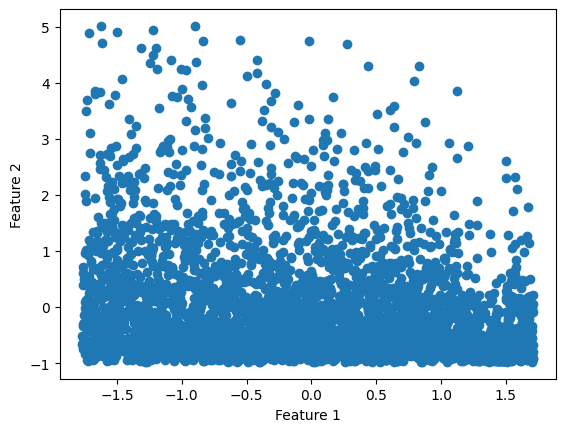


HISTOGRAM


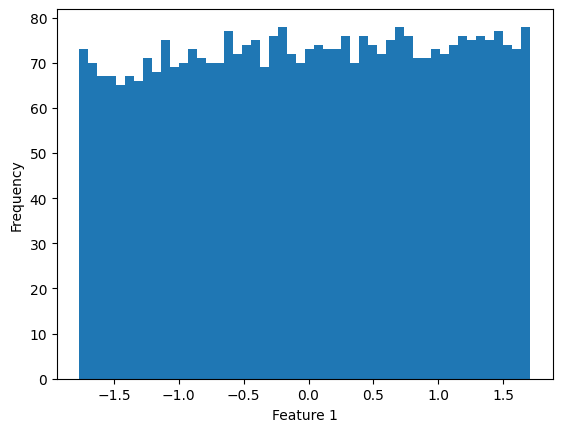

In [5]:
# Visualizing the Data : The dataset is visualized using scatter plots and histograms to gain insights into the distribution of data and identify potential clusters.
import matplotlib.pyplot as plt

# Scatter plot of two features
plt.scatter(data_scaled[:, 0], data_scaled[:, 1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Histogram of a feature
print("\nHISTOGRAM")
plt.hist(data_scaled[:, 0], bins=50)
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.show()


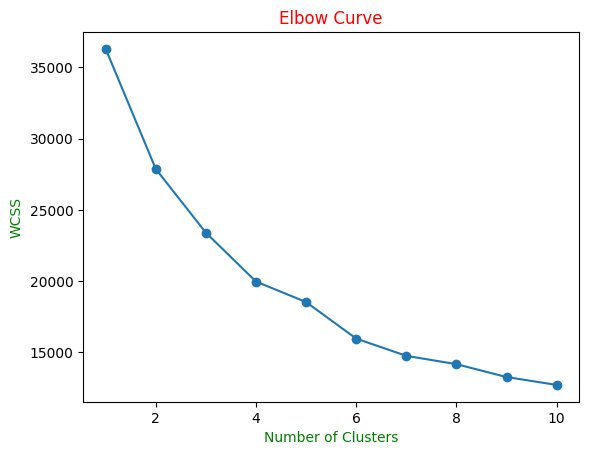

In [15]:
# Elbow Curve
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different cluster numbers
wcss = []
for i in range(1, 11):  # Check for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')  # Added markers for better visualization
plt.title('Elbow Curve',color='red')
plt.xlabel('Number of Clusters',color='green')
plt.ylabel('WCSS',color='green')
plt.show()


# **Implementing Clustering Algorithms**

# K-Means Clustering

In [6]:
from sklearn.cluster import KMeans

# Initialize the K-Means algorithm
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the algorithm to the data
kmeans.fit(data_scaled)

# Get the cluster labels
labels_kmeans = kmeans.labels_

# Hierarchical Clustering


In [7]:
from sklearn.cluster import AgglomerativeClustering

# Initialize the Hierarchical Clustering algorithm
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Fit the algorithm to the data
hierarchical.fit(data_scaled)

# Get the cluster labels
labels_hierarchical = hierarchical.labels_

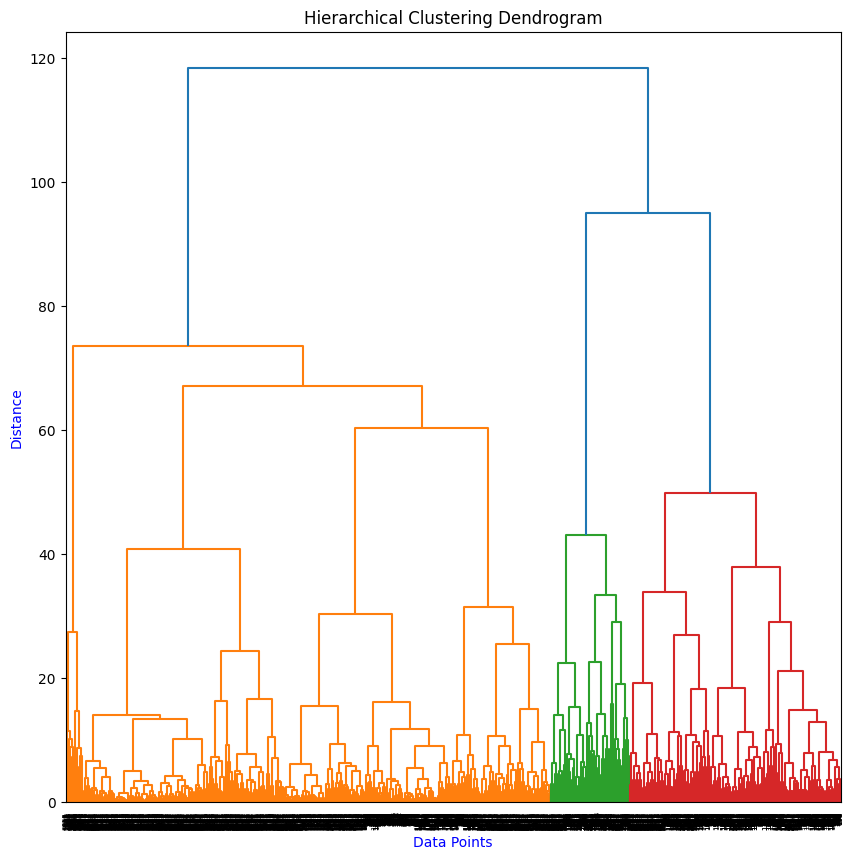

In [17]:
# Dendograms
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Calculate the linkage matrix
linkage_matrix = linkage(data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 10))  # Set the figure size
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points',color='blue')
plt.ylabel('Distance',color='blue')
plt.show()

# DBSCAN Clustering

In [8]:
from sklearn.cluster import DBSCAN

# Initialize the DBSCAN algorithm
dbscan = DBSCAN(eps=0.5, min_samples=10)

# Fit the algorithm to the data
dbscan.fit(data_scaled)

# Get the cluster labels
labels_dbscan = dbscan.labels_

# **Cluster Analysis and Interpretation**

In [9]:
# Analyzing the Clusters : The clusters generated by each clustering algorithm are analyzed, and the characteristics of each cluster are interpreted.

original_column_names = data.columns

# Analyze the clusters generated by K-Means
print("K-Means Clusters:")
print(pd.DataFrame(data_scaled, columns=original_column_names).groupby(labels_kmeans).mean())

# Analyze the clusters generated by Hierarchical Clustering
print("\nHierarchical Clusters:")
print(pd.DataFrame(data_scaled, columns=original_column_names).groupby(labels_hierarchical).mean())

# Analyze the clusters generated by DBSCAN
print("\nDBSCAN Clusters:")
print(pd.DataFrame(data_scaled, columns=original_column_names).groupby(labels_dbscan).mean())


K-Means Clusters:
        ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0  0.249621 -0.387516   -0.049571  -0.614535        0.0        0.0   
1 -0.100947  0.592335    0.481406   0.014163        0.0        0.0   
2 -0.441953  0.593668   -0.010122   1.137754        0.0        0.0   

   Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
0    -0.569651    -0.520842          -0.250750        -0.242700   
1     0.263982     0.661813           3.032057         2.973064   
2     1.001431     0.826419          -0.177852        -0.180279   

   Days_since_enroll    Award?  
0          -0.259350 -0.322102  
1           0.127168  0.602127  
2           0.454448  0.470163  

Hierarchical Clusters:
        ID#   Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  \
0  0.261997 -0.336749    0.041959  -0.496521        0.0        0.0   
1 -0.593244  0.664499   -0.144771   1.201285        0.0        0.0   
2 -0.026213  0.294432    0.128192  -0.155182        0.0        0.0

# **Visualization**
`The clustering results are visualized using scatter plots.`


 K-means


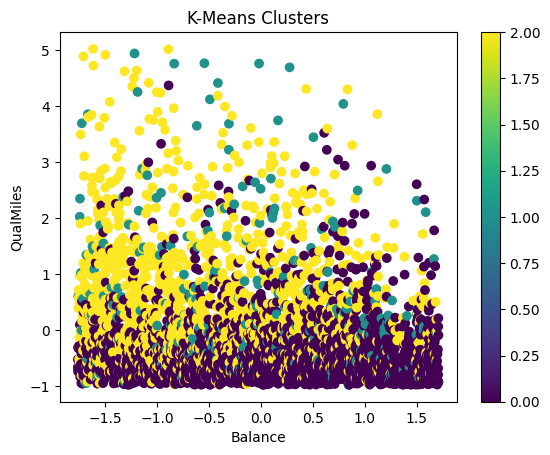


 Hierarchical


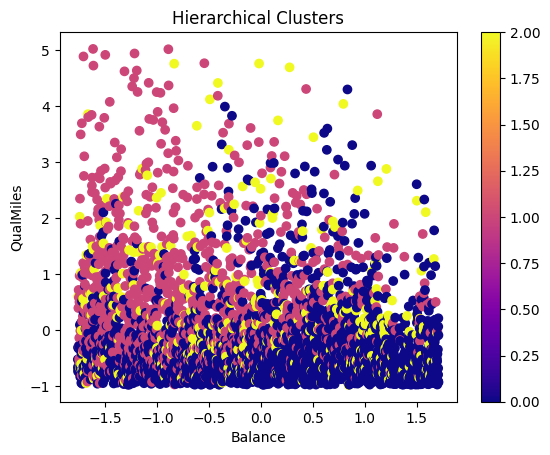


 DBSCAN


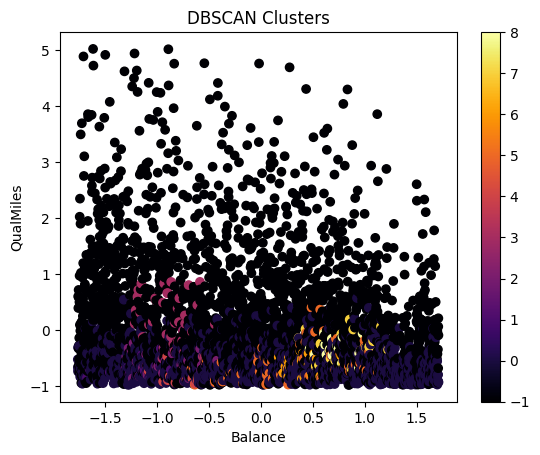

In [10]:
import matplotlib.pyplot as plt

# Visualize the K-Means clusters
print("\n K-means")
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_kmeans, cmap='viridis')
plt.xlabel('Balance')
plt.ylabel('QualMiles')
plt.title('K-Means Clusters')
plt.colorbar()
plt.show()

# Visualize the Hierarchical Clusters
print("\n Hierarchical")
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_hierarchical,cmap='plasma')
plt.xlabel('Balance')
plt.ylabel('QualMiles')
plt.title('Hierarchical Clusters')
plt.colorbar()
plt.show()

# Visualize the DBSCAN Clusters
print("\n DBSCAN")
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels_dbscan,cmap='inferno')
plt.xlabel('Balance')
plt.ylabel('QualMiles')
plt.title('DBSCAN Clusters')
plt.colorbar()
plt.show()

#**Evaluation and Performance Metrics**


In [11]:
# Calculate the silhouette score for each clustering algorithm
from sklearn.metrics import silhouette_score
# Calculate silhouette scores for K-Means, Hierarchical, and DBSCAN
kmeans_score = silhouette_score(data_scaled, labels_kmeans)
hierarchical_score = silhouette_score(data_scaled, labels_hierarchical)
dbscan_score = silhouette_score(data_scaled, labels_dbscan)

print("K-Means Silhouette Score:", kmeans_score)
print("\nHierarchical Silhouette Score:", hierarchical_score)
print("\nDBSCAN Silhouette Score:", dbscan_score)

K-Means Silhouette Score: 0.2919271083786071

Hierarchical Silhouette Score: 0.2635905052685148

DBSCAN Silhouette Score: -0.24509840020139437




```
                                                                      SUBMITTED BY: VAMSI KRISHNA GOPIDESI
```

